Conjunto de dados de vendas de videogames
 Dados de vendas e classificações de jogos de videogame extraidos do VzCharts



In [ ]:
#Libs Necessárias

# Libs para Modelagem e Matrizes
import numpy as np
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [ ]:
# Lendo os dados
Base_Dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

# Verificando
Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
# Dimensão
Base_Dados.shape

(1034, 9)

In [ ]:
# nulos
Base_Dados.isnull().sum()

,0
Game,0
Year,209
Genre,0
Publisher,209
North America,0
Europe,0
Japan,0
Rest of World,0
Global,0


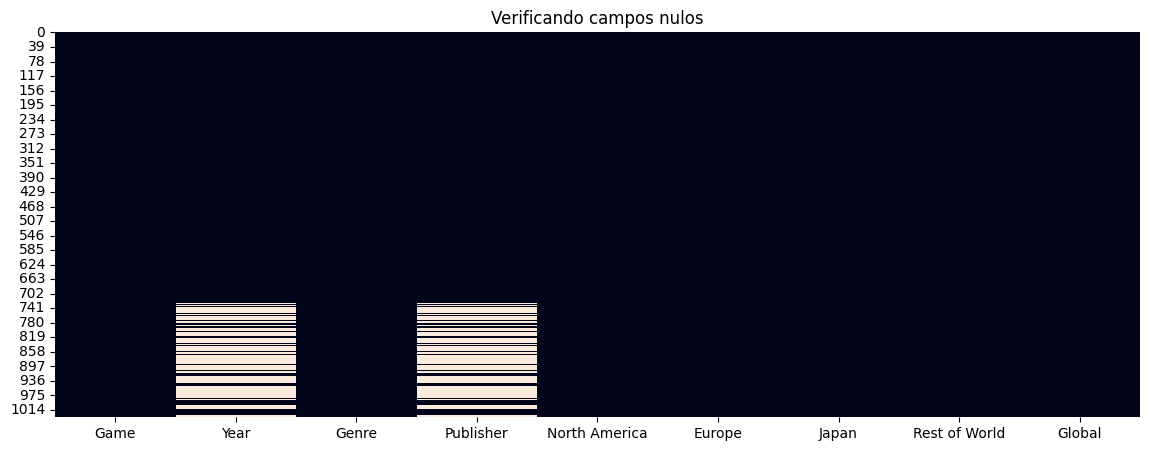

In [ ]:
# Nulos Graficos
plt.figure( figsize=(14, 5) )
plt.title('Verificando campos nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False );

In [ ]:

Base_Dados.dropna()


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1025,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Estatíscas
Base_Dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


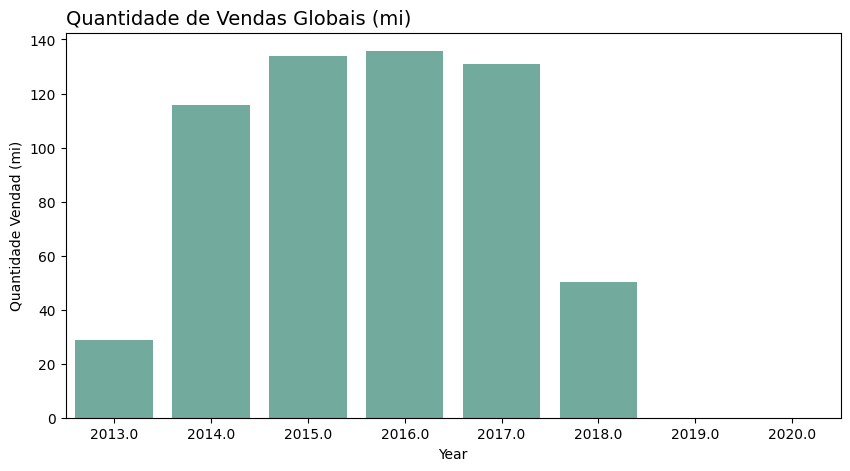

In [ ]:
# Tamanho da imagem
plt.figure( figsize=(10, 5) )

# Titulo
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14 )

# Grafico
sns.barplot( data=Base_Dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum )

# Label
plt.ylabel("Quantidade Vendad (mi)");


In [ ]:
# Retirar os anos
Base_Dados.loc[ ( Base_Dados['Year'] != 2019 ) & ( Base_Dados['Year'] != 2020 ) ]

# Verificar
Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


<Axes: title={'left': 'Distribuição das Vendas Globais'}, xlabel='Global', ylabel='Density'>

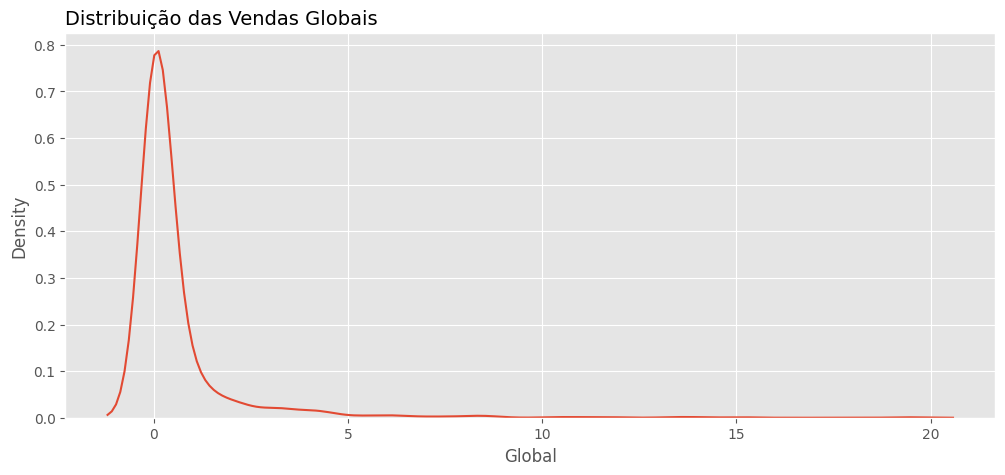

In [ ]:
# Tamanho
plt.figure( figsize=(12, 5) )

# Estilo
plt.style.use('ggplot')

# titulo
plt.title('Distribuição das Vendas Globais', loc='left',fontsize=14)

# Plot
sns.kdeplot( Base_Dados['Global'] )

In [ ]:
Base_Dados.groupby( by=['Year']).sum()

,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Year,,,,,,,,
2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20
2019.0,Brothers in Arms: Furious 4Kingdom Hearts IIIE...,ShooterRole-PlayingMMOAdventureRole-PlayingPla...,UbisoftSquare EnixSony Online EntertainmentSon...,0.00,0.00,0.00,0.00,0.00
2020.0,deep down (Working Title)Whore of the OrientFi...,MiscMiscMiscMiscMiscRacingActionRole-Playing,CapcomWarner Bros. Interactive EntertainmentSq...,0.00,0.00,0.00,0.00,0.00


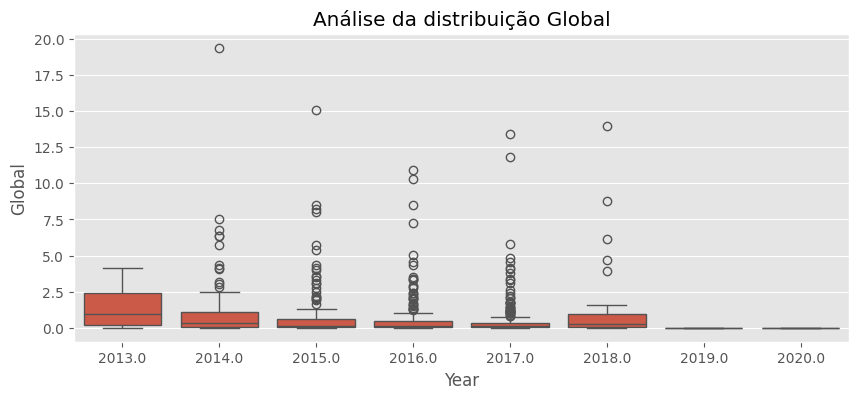

In [ ]:
# Tamanho
plt.figure( figsize=(10, 4) )

# titulo
plt.title('Análise da distribuição Global')

# Plot
sns.boxplot( data=Base_Dados, x='Year', y='Global');

In [ ]:
Base_Dados.loc[ Base_Dados['Global'] >= 10 ]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [ ]:
Base_Dados

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [ ]:
6.05 / 19.39, 9.71 / 19.39, 0.60 / 19.39,

(0.3120165033522434, 0.5007735946364106)

In [ ]:
America = [ (America / Total * 100) if Total != 0 else 0 for America,Total in zip( Base_Dados['North America'], Base_Dados['Global'] ) ]
Europa = [ (Europa / Total * 100) if Total != 0 else 0 for Europa,Total in zip( Base_Dados['Europe'], Base_Dados['Global'] ) ]
Japao = [ (Japao / Total * 100) if Total != 0 else 0 for Japao, Total in zip( Base_Dados['Japan'], Base_Dados['Global'] ) ]
Mundo = [ (Mundo / Total * 100) if Total != 0 else 0 for Mundo, Total in zip( Base_Dados['Rest of World'], Base_Dados['Global'] ) ]

America, Europa, Japao, Mundo

([31.25322331098504,
  40.95427435387674,
  37.73314203730273,
  34.850746268656714,
  10.762711864406779,
  11.517367458866545,
  43.465634075508234,
  41.55251141552512,
  36.67452830188679,
  34.31603773584906,
  13.990267639902672,
  41.22042341220424,
  37.71580345285524,
  30.303030303030305,
  39.881831610044316,
  29.85781990521327,
  13.132911392405061,
  46.016260162601625,
  37.80068728522337,
  43.92361111111111,
  44.73684210526315,
  27.458256029684602,
  35.700197238658774,
  22.567287784679092,
  22.055674518201286,
  40.528634361233486,
  37.52759381898454,
  34.09610983981693,
  29.587155963302752,
  32.407407407407405,
  42.92565947242206,
  30.193236714975846,
  46.3768115942029,
  40.145985401459846,
  30.049261083743843,
  29.064039408867,
  64.321608040201,
  36.45569620253164,
  35.53299492385786,
  16.710875331564985,
  25.0,
  64.77272727272727,
  55.587392550143264,
  18.075801749271136,
  36.904761904761905,
  29.166666666666668,
  63.772455089820355,
  26.5

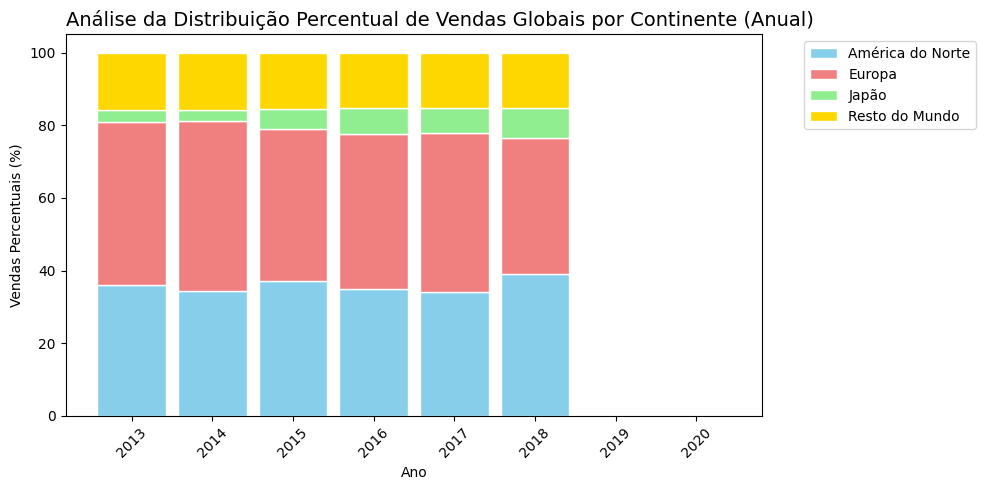

In [ ]:
# Libs Necessárias (re-importando para que a célula seja auto-suficiente)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Lendo os dados para garantir que Base_Dados esteja definido nesta célula
Base_Dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

# Tamanho
plt.figure( figsize= (10, 5))

# Criar o DataFrame Analise agrupando por ano e somando as vendas
# Resetar o índice para que 'Year' se torne uma coluna normal
Analise = Base_Dados.groupby( by=['Year']).sum().reset_index()

# Calcular as porcentagens de vendas por continente para cada ano
America_percent = []
Europa_percent = []
Japao_percent = []
Mundo_percent = []

for index, row in Analise.iterrows():
    total_global_year = row['Global']
    if total_global_year != 0:
        America_percent.append( (row['North America'] / total_global_year) * 100 )
        Europa_percent.append( (row['Europe'] / total_global_year) * 100 )
        Japao_percent.append( (row['Japan'] / total_global_year) * 100 )
        Mundo_percent.append( (row['Rest of World'] / total_global_year) * 100 )
    else:
        America_percent.append(0)
        Europa_percent.append(0)
        Japao_percent.append(0)
        Mundo_percent.append(0)

# Rótulos para o eixo X (anos)
Rotulos = Analise['Year'].astype(int) # Converter ano para inteiro para rótulos mais limpos
Grupos = np.arange(len(Rotulos)) # Posições no eixo X para as barras

Largura_Barra = 0.85

# Plotar um gráfico de barras empilhadas para mostrar a distribuição
plt.bar(Grupos, America_percent, color='skyblue', edgecolor='white', width=Largura_Barra, label='América do Norte')
plt.bar(Grupos, Europa_percent, bottom=America_percent, color='lightcoral', edgecolor='white', width=Largura_Barra, label='Europa')
plt.bar(Grupos, Japao_percent, bottom=[i+j for i,j in zip(America_percent, Europa_percent)], color='lightgreen', edgecolor='white', width=Largura_Barra, label='Japão')
plt.bar(Grupos, Mundo_percent, bottom=[i+j+k for i,j,k in zip(America_percent, Europa_percent, Japao_percent)], color='gold', edgecolor='white', width=Largura_Barra, label='Resto do Mundo')

# Titulo
plt.title('Análise da Distribuição Percentual de Vendas Globais por Continente (Anual)', loc='left', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Vendas Percentuais (%)')
plt.xticks(Grupos, Rotulos, rotation=45) # Definir os ticks e rótulos do eixo X
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Adicionar legenda fora do gráfico
plt.tight_layout() # Ajustar o layout para evitar sobreposição de rótulos
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd # Import pandas for read_csv

# Lendo os dados para garantir que Base_Dados esteja definido nesta célula
Base_Dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

Funcao_Label = LabelEncoder()

Base_Dados['Produtor'] = Funcao_Label.fit_transform( Base_Dados['Publisher'] )
Base_Dados['Genero'] = Funcao_Label.fit_transform( Base_Dados['Genre'] )
Base_Dados['Jogo'] = Funcao_Label.fit_transform( Base_Dados['Game'] )

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,109,0,344
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,129
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,109,1,670
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,133
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,41,14,278


In [7]:
import seaborn as sns

Paleta_Cores = sns.color_palette('Set3', 13)
Paleta_Cores


[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883),
 (0.5529411764705883, 0.8274509803921568, 0.7803921568627451)]

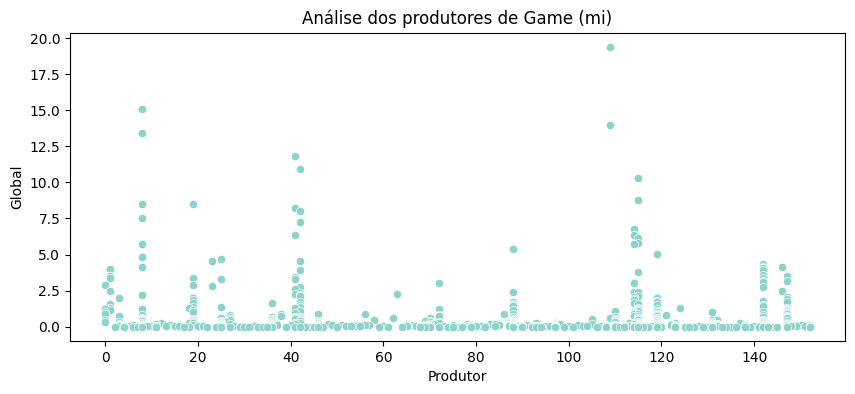

In [9]:
import matplotlib.pyplot as plt

plt.figure( figsize=(10, 4))
plt.title("Análise dos produtores de Game (mi)")
sns.scatterplot(data=Base_Dados, x='Produtor', y='Global', color=Paleta_Cores[0] );

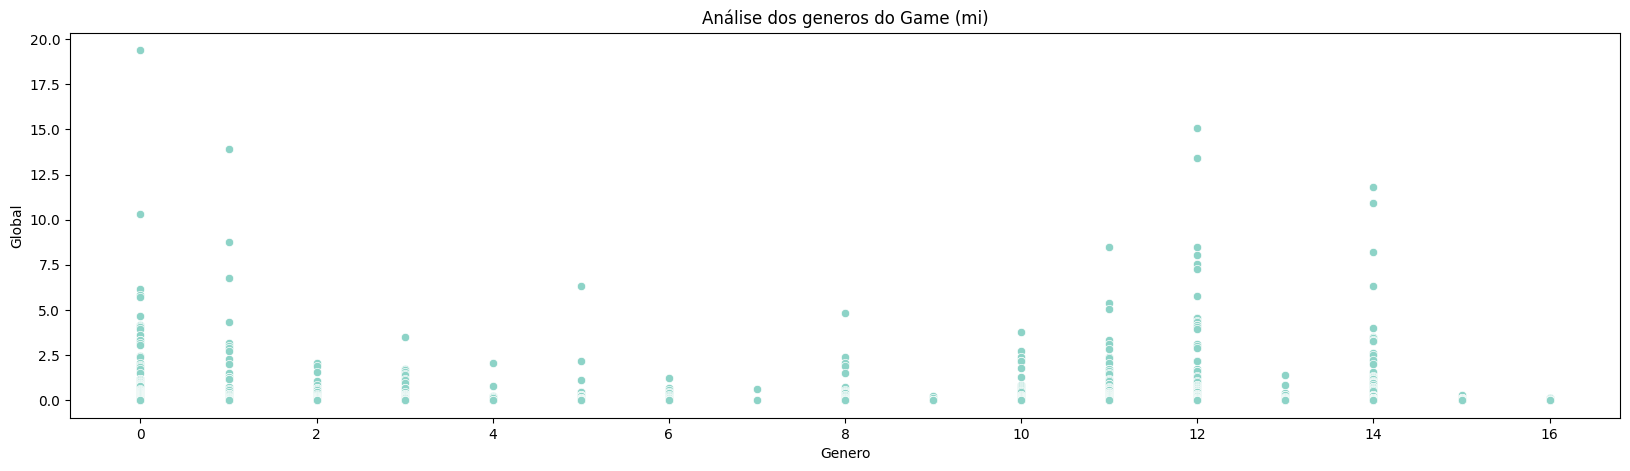

In [ ]:
plt.figure( figsize=(20,5))
plt.title('Análise dos generos do Game (mi)')
sns.scatterplot(data=Base_Dados, x='Genero', y='Global', color=Paleta_Cores[0] );


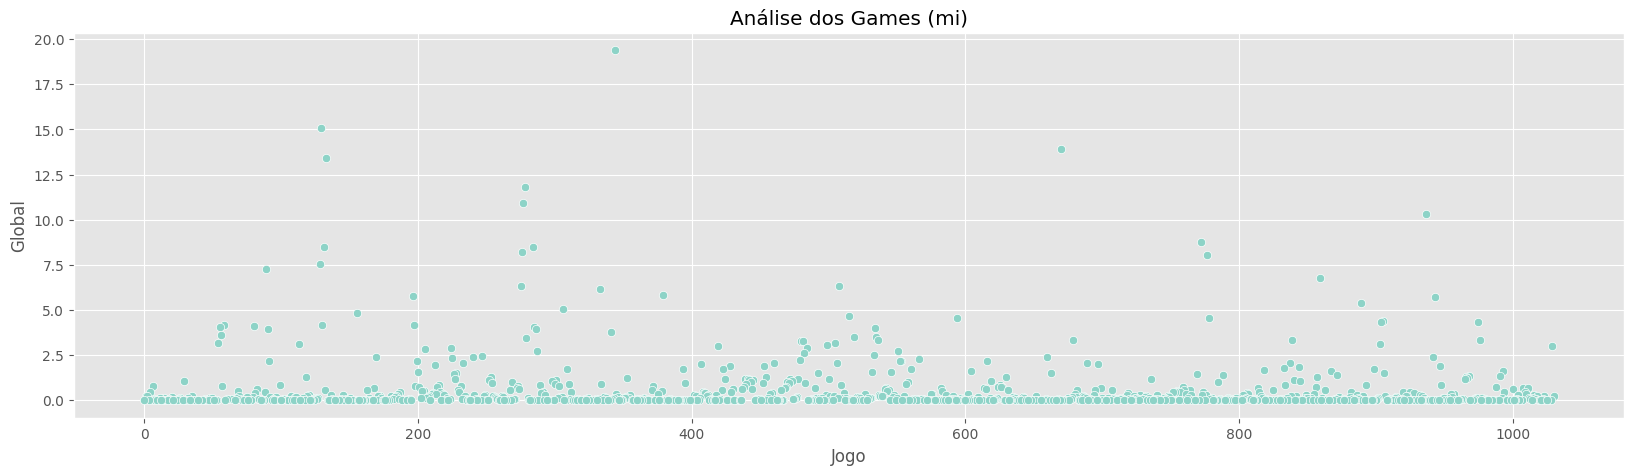

In [63]:
plt.figure( figsize= (20,5))
plt.title('Análise dos Games (mi)')
sns.scatterplot(data=Base_Dados, x='Jogo', y='Global', color=Paleta_Cores[0] );

In [1]:
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- Data Preparation (consolidated from previous cells) ---

# Lendo os dados
Base_Dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

# Aplicar LabelEncoder
Funcao_Label = LabelEncoder()
Base_Dados['Produtor'] = Funcao_Label.fit_transform( Base_Dados['Publisher'] )
Base_Dados['Genero'] = Funcao_Label.fit_transform( Base_Dados['Genre'] )
Base_Dados['Jogo'] = Funcao_Label.fit_transform( Base_Dados['Game'] )

# Criar o DataFrame Analise agrupando por ano e somando as vendas
Analise = Base_Dados.groupby( by=['Year']).sum().reset_index()

# Calcular as porcentagens de vendas por continente para cada ano
America = []
Europa = []
Japao = []
Mundo = []

for index, row in Analise.iterrows():
    total_global_year = row['Global']
    if total_global_year != 0:
        America.append( (row['North America'] / total_global_year) * 100 )
        Europa.append( (row['Europe'] / total_global_year) * 100 )
        Japao.append( (row['Japan'] / total_global_year) * 100 )
        Mundo.append( (row['Rest of World'] / total_global_year) * 100 )
    else:
        America.append(0)
        Europa.append(0)
        Japao.append(0)
        Mundo.append(0)

# Definir Paleta de Cores
Paleta_Cores = sns.color_palette('Set3', 13)


# --- Plotting Code ---

# Relatorio --> Report para o chef

# Tamanho
fig,ax = plt.subplots( figsize=(18, 15) )

# Cor de fundo
Cor_Fundo = '#f5f5f5'
ax.set_facecolor( Cor_Fundo )
fig.set_facecolor( Cor_Fundo )

# Estilo dos gráficos
plt.style.use('ggplot')
plt.suptitle('Python para Análise de Dados \n Projeto prático 5 - Análise Mercado de Games PS4', fontsize=22 , color='#404040', fontweight=600 )

# Parametros para o grid
Linhas = 3
Colunas = 2

# Acessando gráfico 1
plt.subplot( Linhas, Colunas, 1)
# Titulo
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14 )
# Grafico
plt.bar( Analise['Year'], Analise['Global'], color='#69b3a2' )
# Label
plt.ylabel('Quantidade Vendas (mi)')

# Acessando gráfico 2
plt.subplot( Linhas, Colunas, 2)
# Título
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14 )
# Grafico
sns.barplot( data=Analise, x='Year', y='Global', color='#69b3a2' )
# Label
plt.ylabel('Quantidade Vendas (mi)')

# Acessando gráfico 3
plt.subplot( Linhas, Colunas, 3)
# Largura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Year'].astype(int)
Grupos = np.arange(len(Rotulos))

# Titulo
plt.title('Análise distribuição por continentes')

# Plot da America
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )
# Plot da Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc89', edgecolor='white' )
# Plot do Japao
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa)], width=Largura_Barra, color='#a3acff', edgecolor='white' )
# Plot do Resto do mundo
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=Largura_Barra, color='#d3acfe', edgecolor='white')
# Labels
plt.xticks( Grupos, Rotulos, rotation=45 )
plt.xlabel('Ano')
plt.ylabel('Distribuição %')
# Legenda
plt.legend( ['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );

# Acessando gráfico 4
plt.subplot( Linhas, Colunas, 4)
plt.title('Analise dos produtos de Game (mi)', loc='left', fontsize=14 )
sns.scatterplot(data=Base_Dados, x='Produtor', y='Global', color=Paleta_Cores[0] );

# Acessando gráfico 5
plt.subplot( Linhas, Colunas, 5)
plt.title('Analise dos generos de Game (mi)', loc='left', fontsize=14 )
sns.scatterplot(data=Base_Dados, x='Genero', y='Global', color=Paleta_Cores[0] );

# Acessando gráfico 6
plt.subplot( Linhas, Colunas, 6)
plt.title('Analise dos Games (mi)', loc='left', fontsize=14 )
sns.scatterplot(data=Base_Dados, x='Jogo', y='Global', color=Paleta_Cores[0] );

# Ajustar o layout
plt.subplots_adjust( hspace=0.35, wspace=0.15 )

# Rodapé
Rodape = '''
Esse relatório foi elaborado no treinamento do curso de "Python para Análise de Dados"
'''

# Incluindo o rodape no relatorio
fig.text( 0.05, -0.02, Rodape, ha='center', va='bottom', size=12, color='#938ca1');

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'PS4_GamesSales.csv'